<a href="https://colab.research.google.com/github/hoashalarajh/python-code/blob/main/New_Architecture_for_MNIST_Classification_with_CNN_and_Separable_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Architecture - Combining Seperable CNN and Conventional CNN- Example

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import cv2
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print (x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# preparing the data

x_train = x_train / 255

x_test = x_test / 255

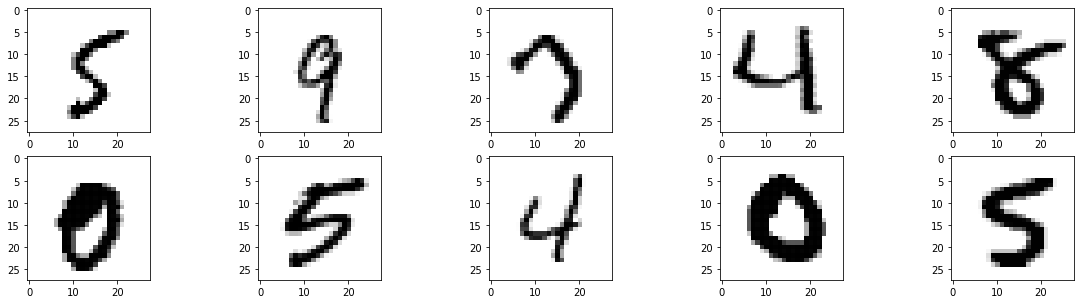

In [5]:
# random image plotting from training set

plt.figure(figsize=(20,5))

for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(x_train[random.randint(1,60000)].reshape(28,28), cmap = 'binary')


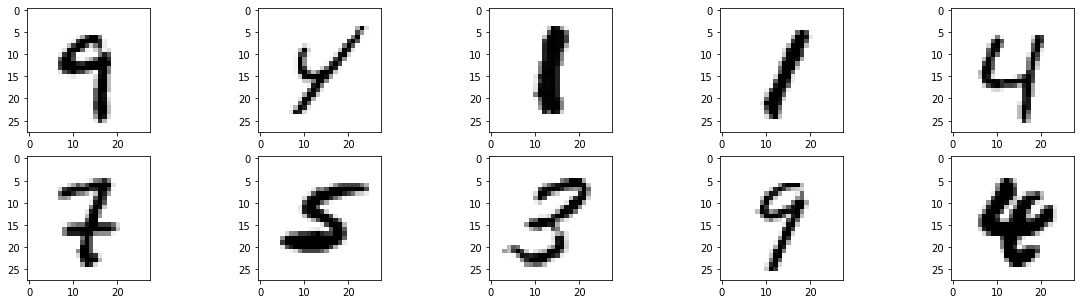

In [6]:
# random image plotting from testing image set

plt.figure(figsize=(20,5))

for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(x_test[random.randint(1,10000)].reshape(28,28), cmap = 'binary')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                        

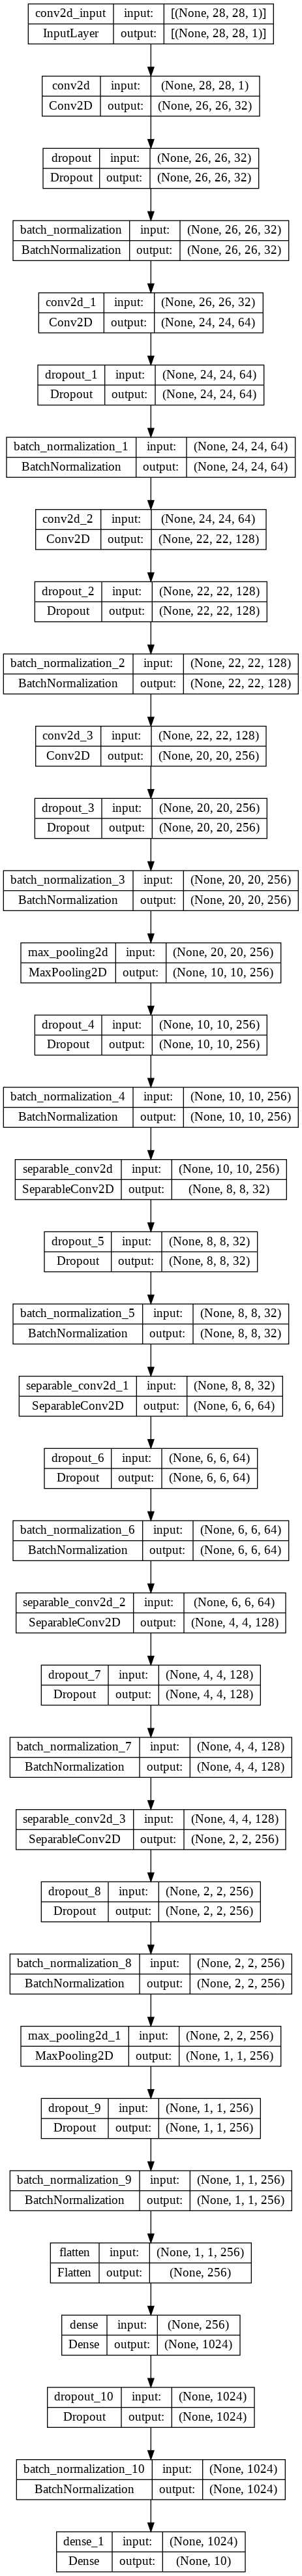

In [7]:
# Model with Depth-wise seperable CNN

model = tf.keras.Sequential()
## Feature Extraction is Done here
# Convolutional Layer
model.add(layers.Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.Conv2D(256, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())

# Separable Convolutional Layer
model.add(layers.SeparableConv2D(32, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.SeparableConv2D(64, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.SeparableConv2D(128, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.SeparableConv2D(256, (3,3), activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())



# Flattening the feature maps
model.add(layers.Flatten())
# Feed it to Fully Connected Layers
# Classification is Done here
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(BatchNormalization())

model.add(layers.Dense(10, activation = 'softmax'))

model.summary()
tf.keras.utils.plot_model(model, show_shapes = True)

In [8]:
# Compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [9]:
# introducing callback if there is no improvement in training after 3 epochs
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5)

In [10]:
# training the model
history = model.fit(x_train, y_train, epochs = 100, batch_size = 256, callbacks = [callback], verbose = 1 ,validation_data = (x_test, y_test))

Epoch 1/100
235/235 [==============================] - 33s 95ms/step - loss: 0.4172 - accuracy: 0.8705 - val_loss: 2.6082 - val_accuracy: 0.1135
Epoch 2/100
235/235 [==============================] - 21s 90ms/step - loss: 0.1003 - accuracy: 0.9693 - val_loss: 0.9246 - val_accuracy: 0.6503
Epoch 3/100
235/235 [==============================] - 21s 90ms/step - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.0656 - val_accuracy: 0.9809
Epoch 4/100
235/235 [==============================] - 21s 90ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0466 - val_accuracy: 0.9853
Epoch 5/100
235/235 [==============================] - 21s 91ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0337 - val_accuracy: 0.9894
Epoch 6/100
235/235 [==============================] - 21s 91ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 7/100
235/235 [==============================] - 22s 92ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0407 - val_ac

In [11]:
# model performance
loss, acc = model.evaluate(x_test, y_test)
print (f"Test Accuracy is : {(acc * 100):.2f} %")

313/313 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9933
Test Accuracy is : 99.33 %


Shape of Original Image is : (584, 752, 3)


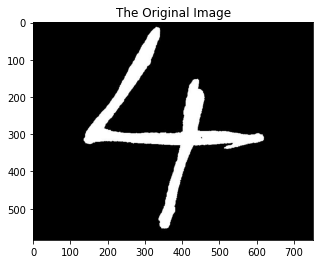

In [12]:
# read an image input
img = cv2.imread("imageTest.jpg")
plt.imshow(img)
plt.title("The Original Image")
print (f"Shape of Original Image is : {img.shape}")

The shape of gray scale image is (584, 752)
Shape of Resized IMage is : (28, 28)


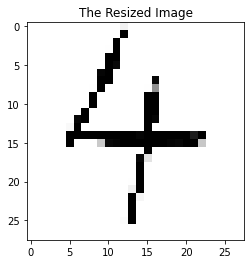

In [13]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print (f"The shape of gray scale image is {img.shape}")
# resize the image
img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
plt.imshow(img, cmap = 'binary'); plt.title ("The Resized Image")
print (f"Shape of Resized IMage is : {img.shape}")

In [14]:
# normalizing the image
img = img / 255

In [15]:
img = tf.expand_dims(img, 0)  # Create batch axis
print (f"Shape of img is : {img.shape}")

Shape of img is : (1, 28, 28)


In [16]:
# categories
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9']

# making prediction
prediction = model.predict(img)
print (prediction[0])
print(prediction[0].argmax())

1/1 [==============================] - 0s 303ms/step
[1.1565819e-08 6.2975559e-08 9.3666612e-09 9.9482769e-11 9.9997675e-01
 1.9498083e-09 2.5085200e-07 2.9488876e-06 4.0778343e-07 1.9443940e-05]
4


In [17]:
pred_name = CATEGORIES[np.argmax(prediction)]
print (f"type of pred_name is : {type(pred_name)}")
print(f"The predicted class is : {pred_name}")

type of pred_name is : <class 'str'>
The predicted class is : 4


In [18]:
# Saving the trained model
model.save("MNISTdigitClassifier.h5")

# THE END